### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
import numpy as np

dati = pd.read_csv("data.csv")

dati

,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
127,1960-08,606.0
128,1960-09,508.0
129,1960-10,461.0
130,1960-11,NaN


In [3]:
dati["mese_numerico"] = np.arange(1, len(dati["date"])+1) #Conta i mesi?????
dati

,date,passengers,mese_numerico
0,1949-01,112.0,1
1,1949-02,118.0,2
2,1949-03,132.0,3
3,1949-04,129.0,4
4,1949-05,121.0,5
...,...,...,...
127,1960-08,606.0,128
128,1960-09,508.0,129
129,1960-10,461.0,130
130,1960-11,NaN,131


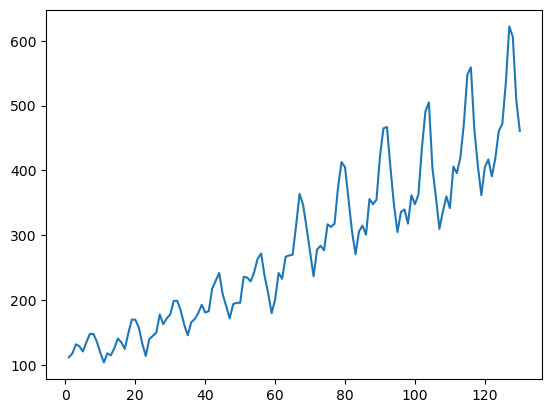

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import interp1d
import scipy as sp

X = dati["mese_numerico"].values
Y = dati["passengers"].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=(len(X)-2), shuffle=False)
plt.plot(X_train, y_train)
#plt.plot(X_test, y_test)
model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
#model_poly2.fit(X_train, y_train)




### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [1]:
import numpy as np
from dash import *
from dash.dependencies import Input, Output
import plotly.express as pl
from math import *
import pandas as pa


app = Dash(__name__)
app.layout = html.Div([html.H4("Slider polinomio e grafico"), dcc.Slider(id = "slider grado del polinomio", min = 1, max = 10, step = 1, value = 1, marks = {i: str(i) for i in range (1, 11)}), dcc.Graph(id="scatter-plot")])

In [6]:
@app.callback(Output("scatter-plot", "figure"), Input("slider grado del polinomio", "value"))
def scatplot(grado):
    a = np.linspace(-3, 3, 100)
    b = np.linspace(0, 0, 100)
    for i in range(1, grado+1):
        b = b + i*a**i
    print(b)
    df = pa.DataFrame({"x": a, "y": b})
    return pl.scatter(df, x = "x", y = "y")

In [7]:
if __name__ == '__main__':
    app.run()